<a href="https://colab.research.google.com/github/Graviton12/CS-430-Group-Project/blob/main/2021_2024_Cherokee_Invasive_Survey_EDA_tyler.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data Notebook 2021 Data






In [1]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# loading dataset
# using skiprows=1 to skip the first row of the dataset
d2021=pd.read_excel("/content/drive/MyDrive/Bellarmine/CS430/olmstead_dataset.xlsx", sheet_name="2021 Cherokee Invasive Survey", skiprows=1)

d2024 = pd.read_excel('/content/drive/MyDrive/Bellarmine/CS430/olmstead_dataset.xlsx', sheet_name='2024 Cherokee Invasive Survey',skiprows=1)

In [4]:
# viewing dataset
d2021.head(3)
d2024.head(3)

,Comment,N,E,S,W,Calculated using formula in densiometer,Calculated using formula in densiometer.1,Canopy,Understory,Lonicera japonica,...,Fallopia japonica,Achyranthes,Hederea helix,L. maackii,Privet/ Ligustrum,Ailanthus,Canopy gap and/or downed trees present,SUM,Dioscorea polystachya,Unnamed: 27
0,Cherokee1,12.0,3,5,7,7.02,92.98,"Walnut, maple, mulberry, locust","Boxelder, maple, hackberry",1.0,...,0.0,1.0,3.0,3.0,0.0,0.0,2.0,20,NaN,NaN
1,Cherokee2,3.0,0,2,2,1.82,98.18,"Cherry, hackberry, maple","Maple, buckeye, locust",4.0,...,0.0,1.0,1.0,3.0,0.0,0.0,0.0,15,NaN,NaN
2,Cherokee3,1.0,0,4,5,2.60,97.40,"Oak, basswood, maple","Maple, ash",3.0,...,0.0,0.0,1.0,3.0,0.0,0.0,1.0,10,NaN,NaN


In [5]:
# findng the shape of the dataset
d2021.shape

(164, 25)

In [6]:
# renaming columns
d2021 = d2021.rename(columns={'Trimble\nStation':'Trimble_station', 'Calculated using formula in densiometer':'average_canopy_cover', 'Calculated using formula in densiometer.1':'form_densiometer.1'})
d2024 = d2024.rename(columns={'Trimble\nStation':'Trimble_station', 'Calculated using formula in densiometer':'average_canopy_cover', 'Calculated using formula in densiometer.1':'form_densiometer.1'})

In [7]:
d2021.head()

,Trimble_station,N,E,S,W,average_canopy_cover,form_densiometer.1,Canopy,Understory,Lonicera japonica,...,Vinca minor,Euonymus fortunei,Akebia quinata,Fallopia japonica,Achyranthes,Hederea helix,L. maackii,Privet/ Ligustrum,Ailanthus,Canopy gap and/or downed trees present
0,1,37,5,23,90.0,40.30,59.70,"Cherry, sassafrass, maple, hackberry, walnutash","Box elder, sugar maple saplings",2,...,0,3,0,0,0,1,3,0,0,1.0
1,2,8,4,3,5.0,5.20,94.80,"Cherry, black locust, ash, sugar maple, tulip ...","Sugar maple, ash, redbud, box elder,",1,...,0,4,0,0,0,2,1,0,0,0.0
2,3,10,6,13,17.0,11.96,88.04,"Tilia basswood, n red oak, maple, pin oak, hic...","Holly, maple saplings, ash saplings, buckeye",1,...,0,4,0,0,0,2,1,0,0,0.0
3,4,6,3,8,3.0,5.20,94.80,"Elm, cottonwood, walnut, sycamore, ironwood","Box elder, redbud, ash saplings",1,...,0,3,0,0,0,3,3,0,0,0.0
4,5,25,23,30,22.0,26.00,74.00,Basswood locust red oak ash?,Buckeye Spicebush ash sapling,3,...,1,3,0,0,1,1,3,0,0,0.0


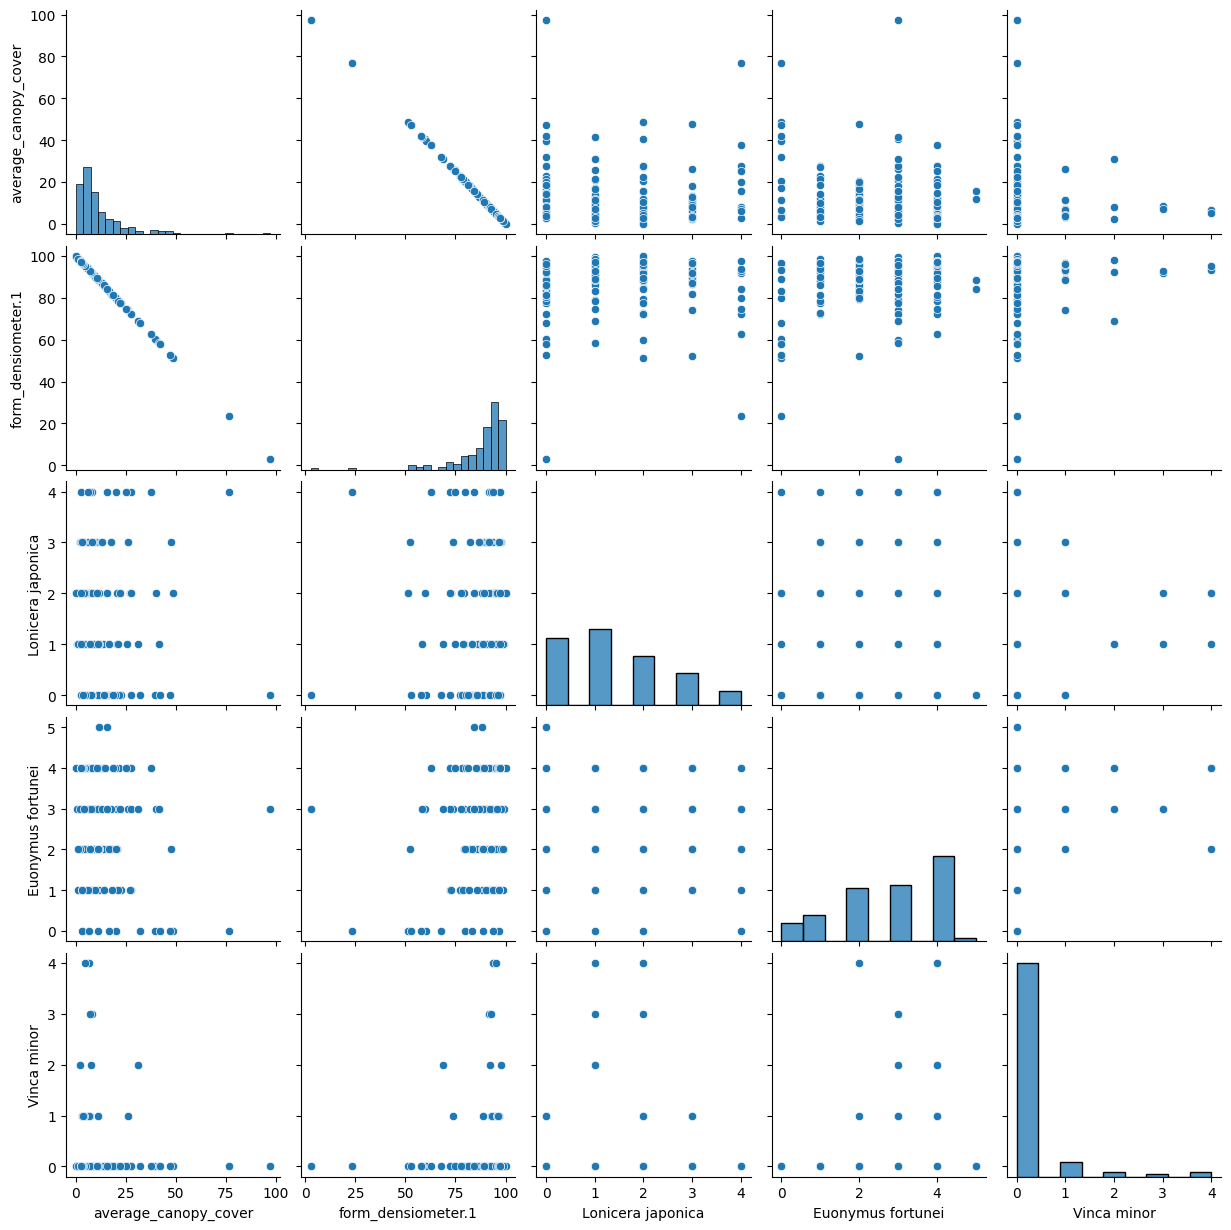

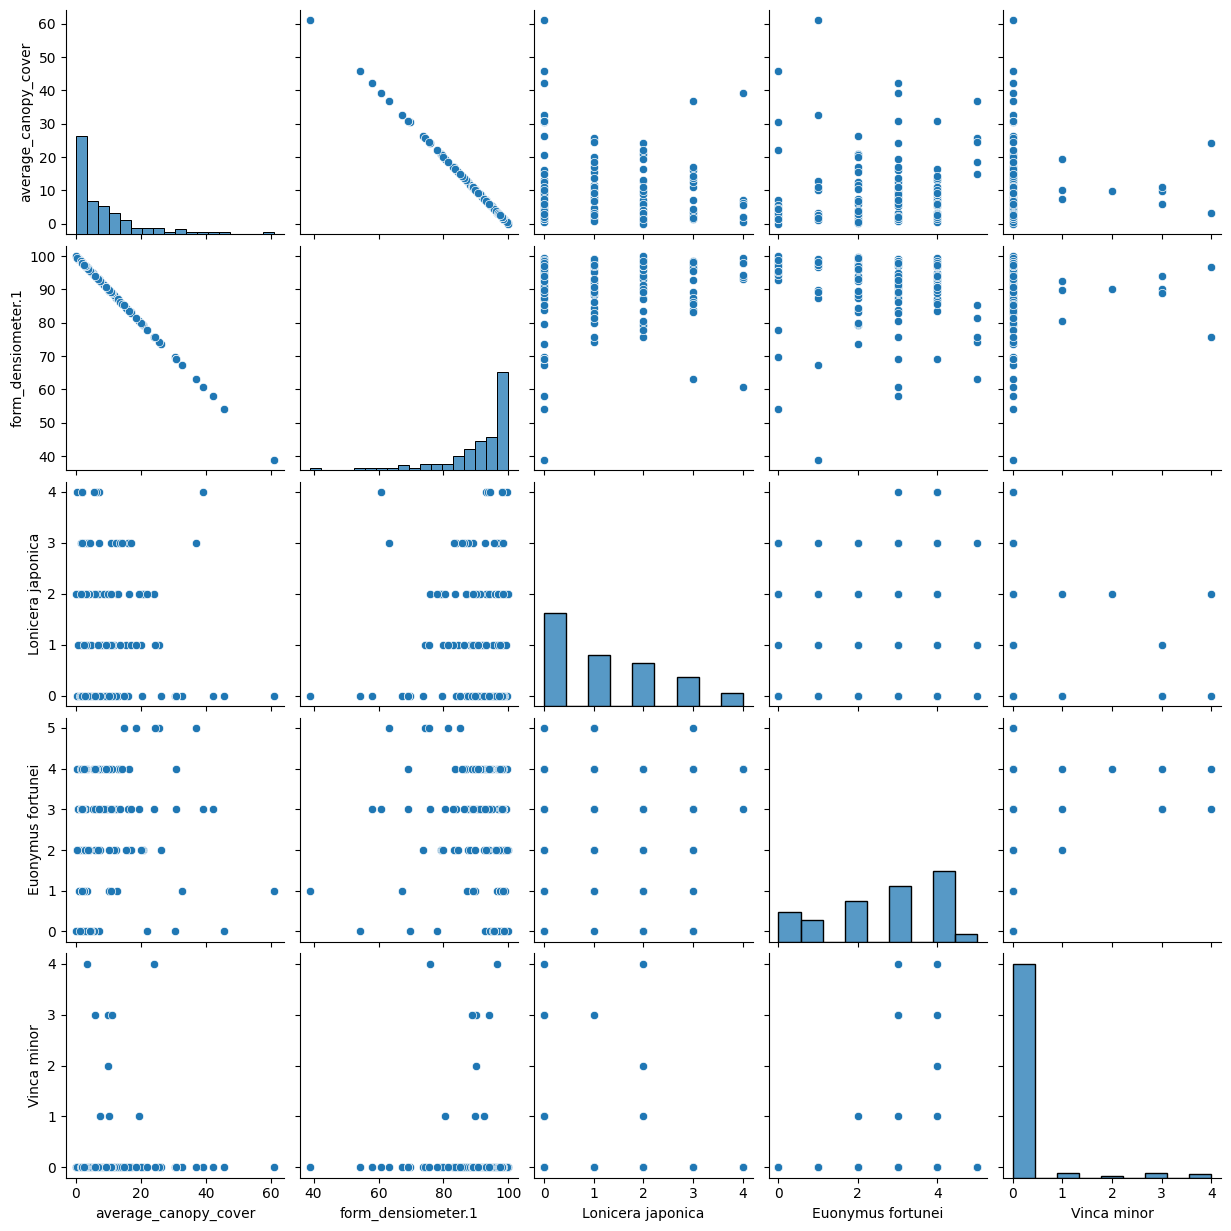

In [8]:
# 2021 Clean
df_clean21 = d2021[['average_canopy_cover',
               'form_densiometer.1',
               'Lonicera japonica', 'Euonymus fortunei', 'Vinca minor']]  # Adjust based on the exact column names


# Convert columns to numeric if necessary
df_clean21 = df_clean21.apply(pd.to_numeric, errors='coerce')

# Drop rows with missing data to avoid issues
df_clean21 = df_clean21.dropna()

# Create pairplot
sns.pairplot(df_clean21)
# 2024 clean
df_clean24 = d2024[['average_canopy_cover',
               'form_densiometer.1',
               'Lonicera japonica', 'Euonymus fortunei', 'Vinca minor']]  # Adjust based on the exact column names


# Convert columns to numeric if necessary
df_clean24 = df_clean24.apply(pd.to_numeric, errors='coerce')

# Drop rows with missing data to avoid issues
df_clean24 = df_clean24.dropna()

# Create pairplot
sns.pairplot(df_clean24)
plt.show()

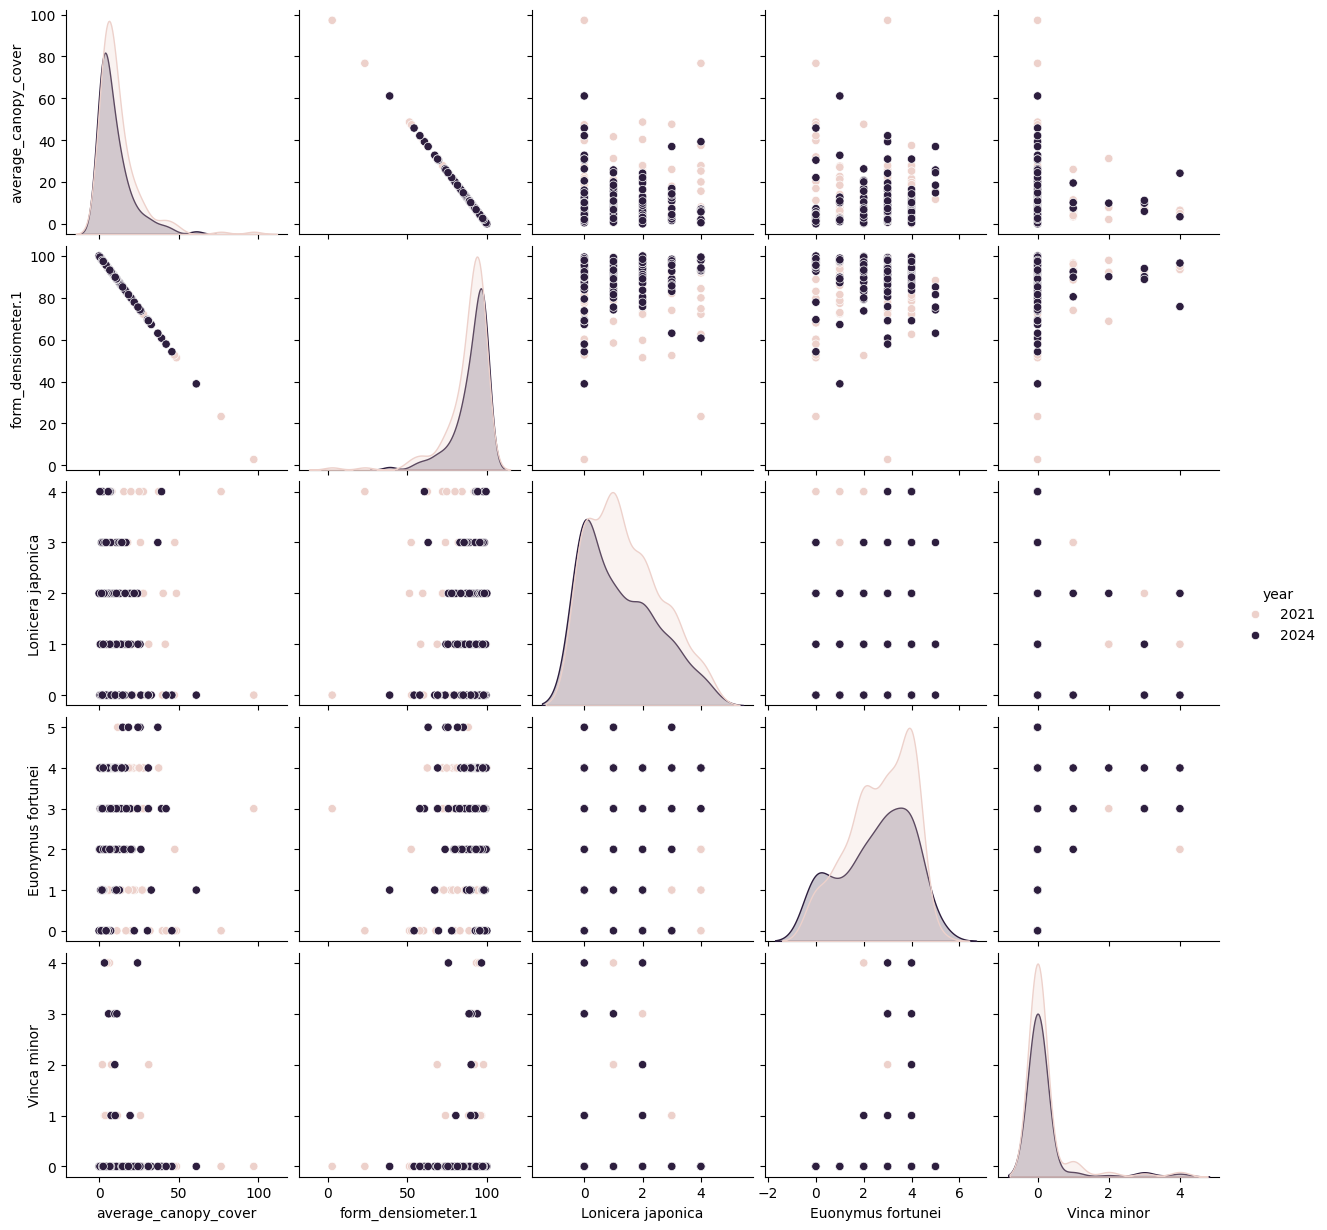

In [10]:
# Add a year column to each dataframe to differentiate the years
d2021['year'] = 2021
d2024['year'] = 2024

# Select the same columns from both datasets
columns_of_interest = ['average_canopy_cover', 'form_densiometer.1',
                       'Lonicera japonica', 'Euonymus fortunei', 'Vinca minor']

# Subset both datasets with the same columns
df_2021_clean = d2021[columns_of_interest + ['year']].apply(pd.to_numeric, errors='coerce')
df_2024_clean = d2024[columns_of_interest + ['year']].apply(pd.to_numeric, errors='coerce')

# Concatenate the two dataframes
df_combined = pd.concat([df_2021_clean, df_2024_clean])

# Drop duplicate rows
df_combined = df_combined.dropna()
df_combined = df_combined.drop_duplicates(
    subset=['average_canopy_cover', 'form_densiometer.1', 'Lonicera japonica', 'Euonymus fortunei', 'Vinca minor']
)

# Create a pairplot and color it by the 'year' column
sns.pairplot(df_combined, hue='year')
plt.show()

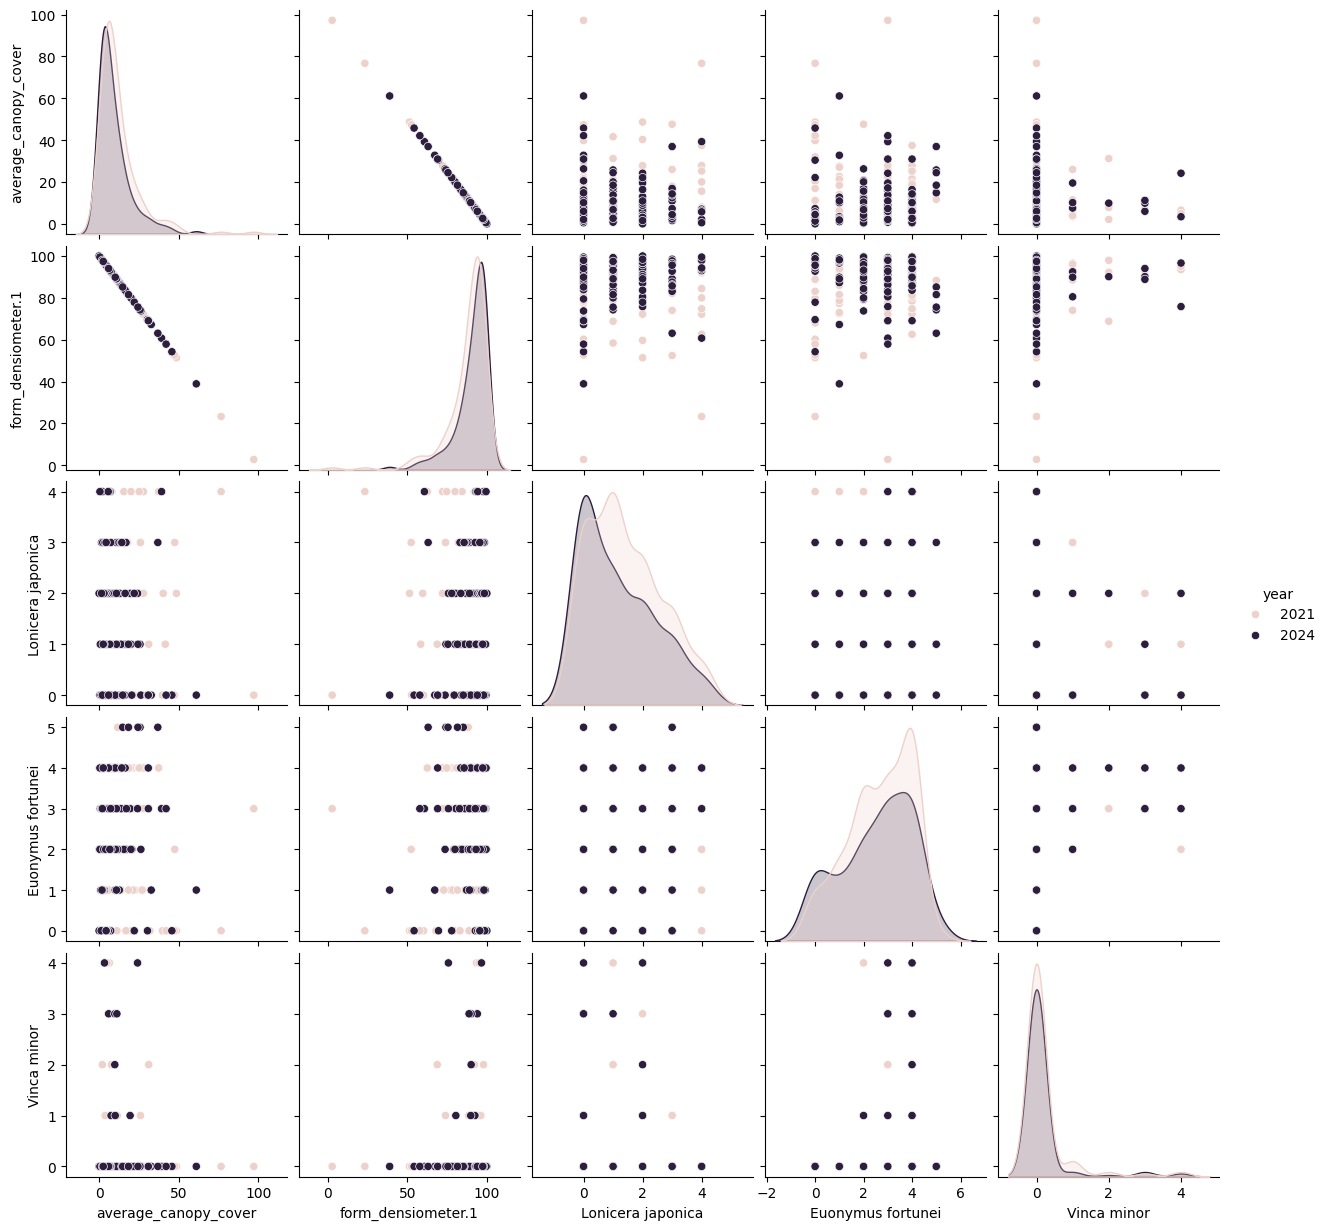

In [11]:

# Add a year column to each dataframe to differentiate the years
d2021['year'] = 2021
d2024['year'] = 2024

# Select the same columns from both datasets
columns_of_interest = ['average_canopy_cover', 'form_densiometer.1',
                       'Lonicera japonica', 'Euonymus fortunei', 'Vinca minor']

# Subset both datasets with the same columns
df_2021_clean = d2021[columns_of_interest + ['year']].apply(pd.to_numeric, errors='coerce')
df_2024_clean = d2024[columns_of_interest + ['year']].apply(pd.to_numeric, errors='coerce')

# Concatenate the two dataframes
df_combined = pd.concat([df_2021_clean, df_2024_clean])

# Drop rows with missing data
df_combined = df_combined.dropna()

# Drop duplicate rows
df_combined = df_combined.drop_duplicates()

# Create a pairplot and color it by the 'year' column
sns.pairplot(df_combined, hue='year')
plt.show()

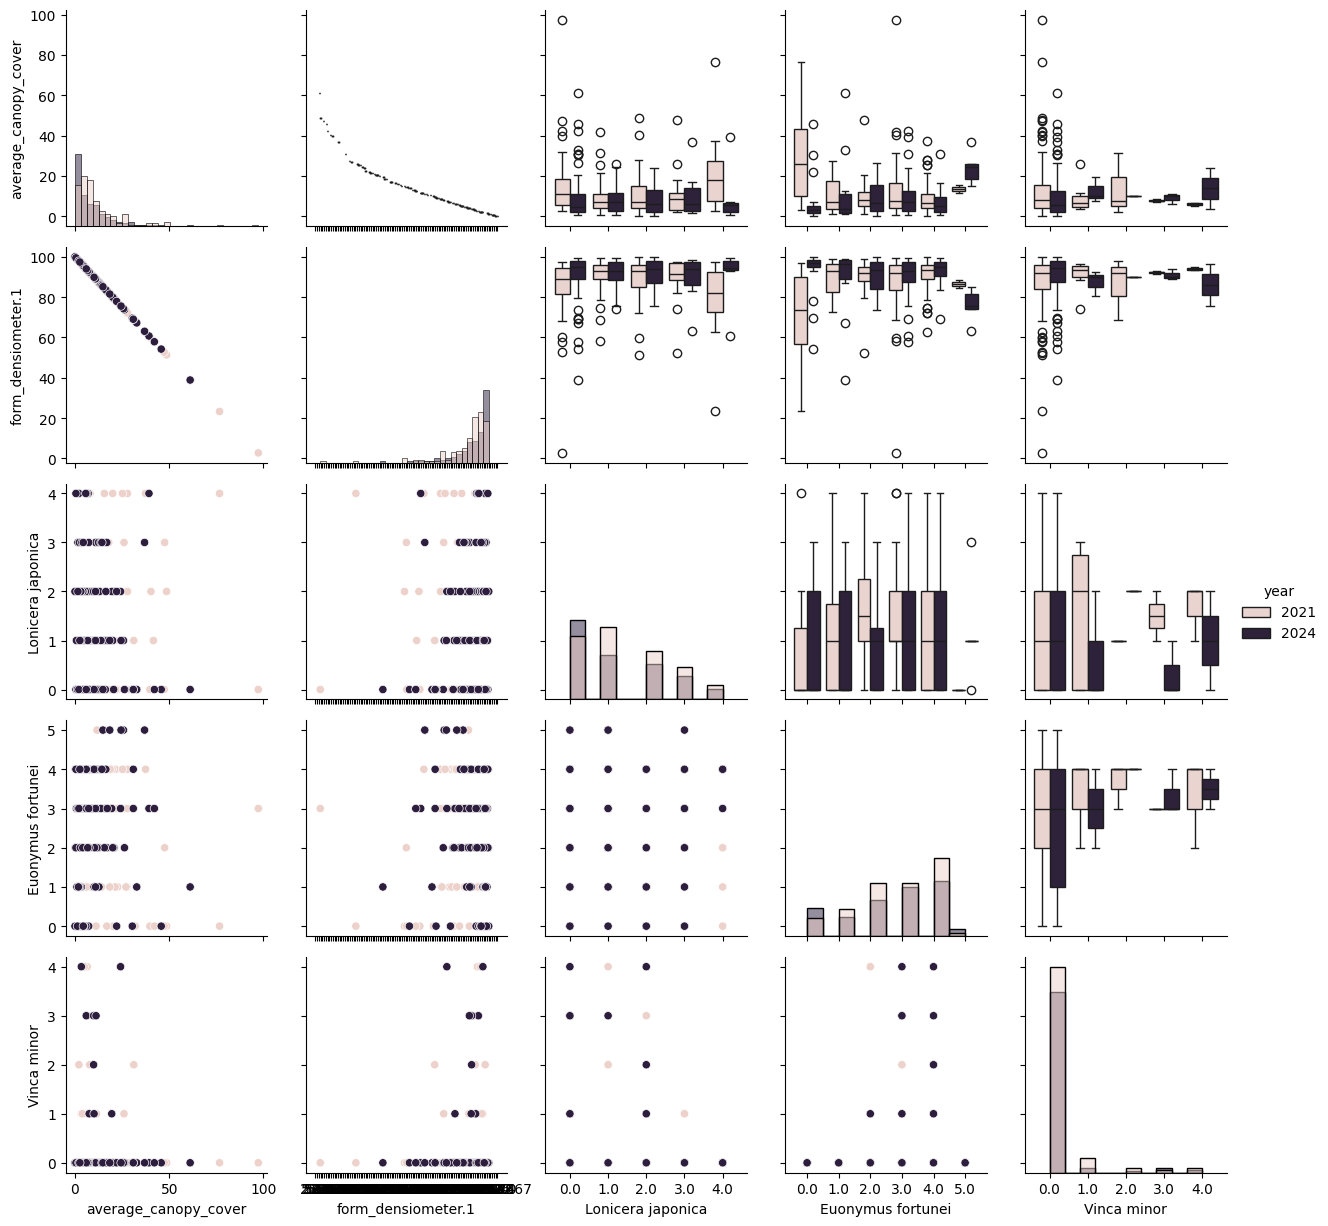

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the PairGrid
g = sns.PairGrid(df_combined, hue='year')

# Define the type of plot for the lower triangle (e.g., scatter plot)
g.map_lower(sns.scatterplot)

# Define the type of plot for the upper triangle (e.g., box plot)
g.map_upper(sns.boxplot)

# Define the type of plot for the diagonal (e.g., histograms)
g.map_diag(sns.histplot, kde=False)

# Add a legend
g.add_legend()

# Show the plot
plt.show()


In [13]:
import numpy as np
import pandas as pd

# Function to remove outliers based on IQR
def remove_outliers_iqr(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    return df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

# Apply the outlier removal function
df_no_outliers = remove_outliers_iqr(df_combined)


In [14]:
from sklearn.preprocessing import MinMaxScaler

# Normalize the data (scaling each column between 0 and 1)
scaler = MinMaxScaler()
df_normalized = pd.DataFrame(scaler.fit_transform(df_no_outliers), columns=df_no_outliers.columns)


In [15]:
from sklearn.preprocessing import StandardScaler

# Standardize the data (mean=0, std=1)
scaler = StandardScaler()
df_standardized = pd.DataFrame(scaler.fit_transform(df_no_outliers), columns=df_no_outliers.columns)


In [16]:
print(df_no_outliers.describe())


       average_canopy_cover  form_densiometer.1  Lonicera japonica  \
count             241.00000           241.00000         241.000000   
mean                8.26462            91.73538           1.323651   
std                 6.79443             6.79443           1.215791   
min                 0.00000            72.18000           0.000000   
25%                 2.86000            88.30000           0.000000   
50%                 6.24000            93.76000           1.000000   
75%                11.70000            97.14000           2.000000   
max                27.82000           100.00000           4.000000   

       Euonymus fortunei  Vinca minor         year  
count         241.000000        241.0   241.000000  
mean            2.597510          0.0  2022.406639  
std             1.350862          0.0     1.500207  
min             0.000000          0.0  2021.000000  
25%             2.000000          0.0  2021.000000  
50%             3.000000          0.0  2021.000000 

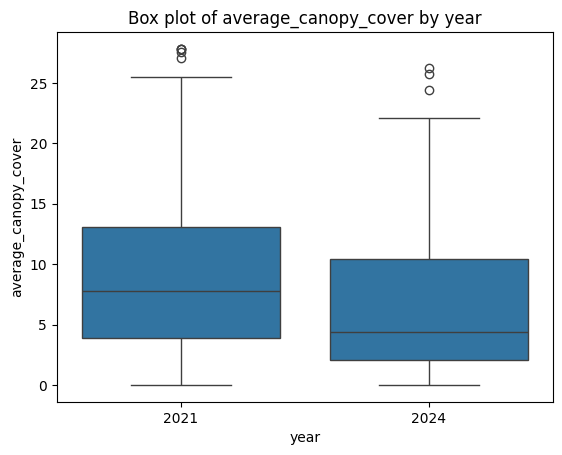

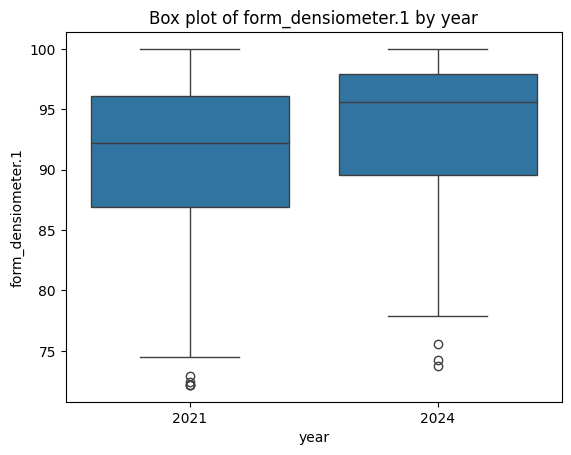

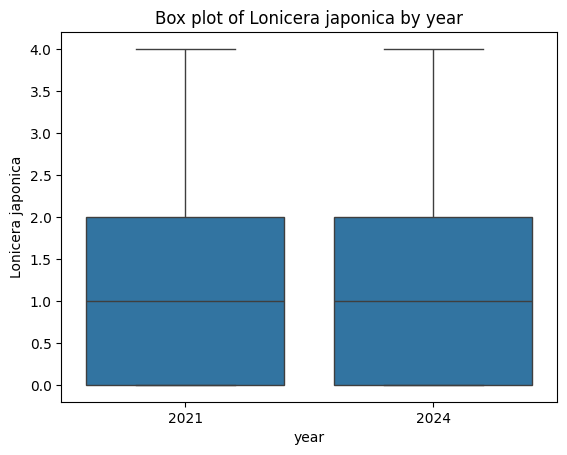

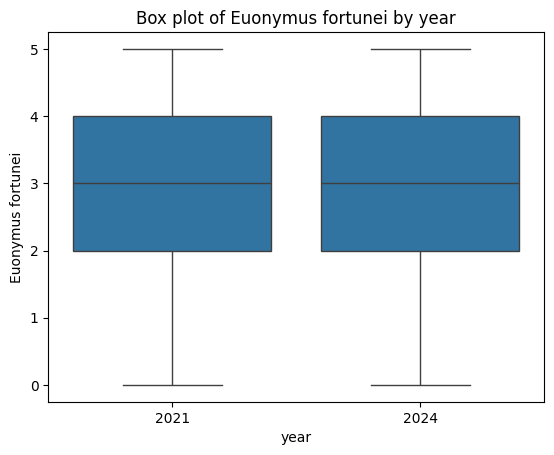

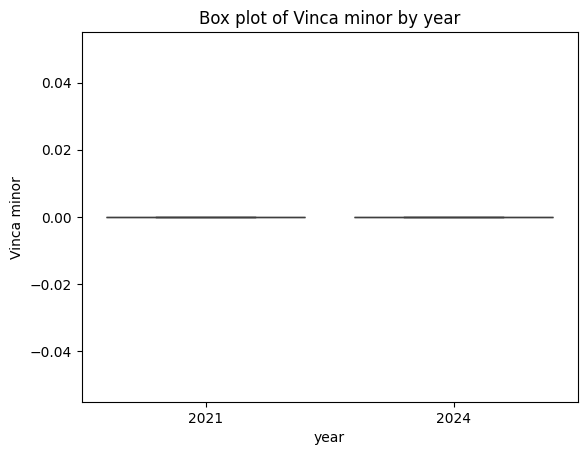

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize each column as a box plot after outlier removal
for column in df_no_outliers.columns[:-1]:  # Skip the 'year' column
    sns.boxplot(x='year', y=column, data=df_no_outliers)
    plt.title(f'Box plot of {column} by year')
    plt.show()


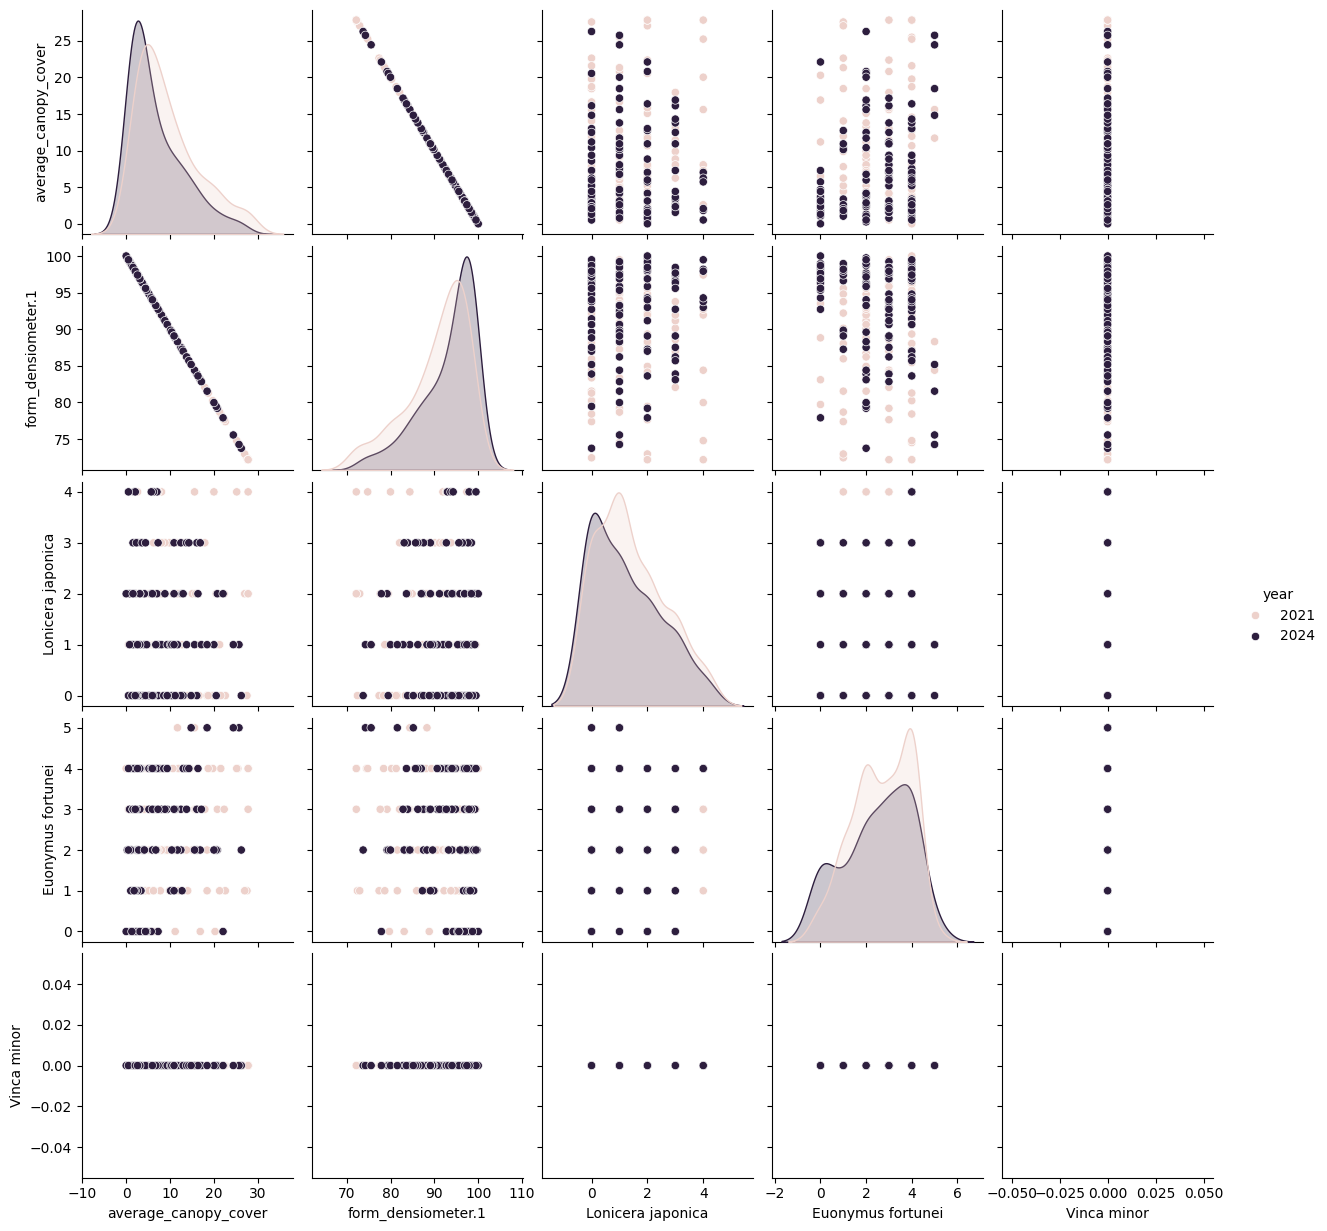

In [18]:
sns.pairplot(df_no_outliers, hue='year')
plt.show()

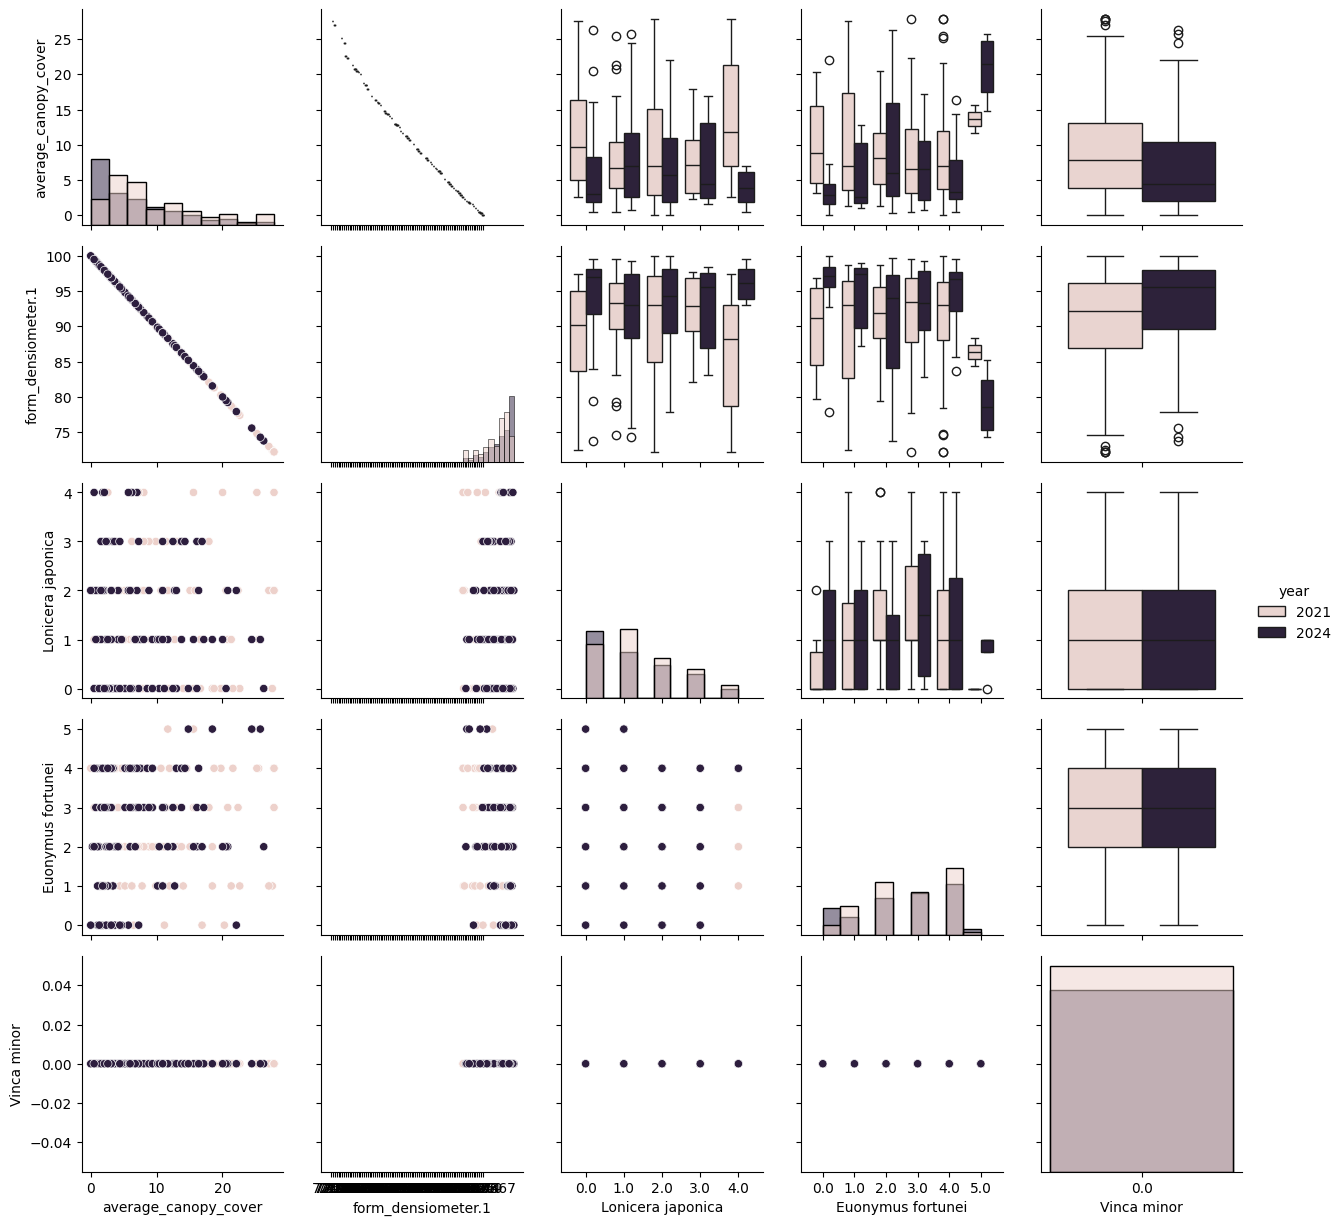

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the PairGrid
g = sns.PairGrid(df_no_outliers, hue='year')

# Define the type of plot for the lower triangle (e.g., scatter plot)
g.map_lower(sns.scatterplot)

# Define the type of plot for the upper triangle (e.g., box plot)
g.map_upper(sns.boxplot)

# Define the type of plot for the diagonal (e.g., histograms)
g.map_diag(sns.histplot, kde=False)

# Add a legend
g.add_legend()

# Show the plot
plt.show()